<a href="https://colab.research.google.com/github/somayeh-najafi/datasciense/blob/main/week9/Salary_Estimator_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle

In [2]:
uploaded = files.upload()

Saving df.csv to df.csv


In [4]:
raw_df = pd.read_csv('df.csv')

In [45]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5496 entries, 0 to 5887
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5496 non-null   object 
 1   Salary Estimate    5496 non-null   object 
 2   Rating             5496 non-null   float64
 3   Company Name       5496 non-null   object 
 4   Location           5496 non-null   object 
 5   Size               5496 non-null   object 
 6   Founded            5496 non-null   object 
 7   Type of ownership  5496 non-null   object 
 8   Industry           5496 non-null   object 
 9   Sector             5496 non-null   object 
 10  Revenue            5496 non-null   object 
 11  min_salary         5496 non-null   int64  
 12  max_salary         5496 non-null   int64  
 13  average_salary     5496 non-null   float64
 14  state              5496 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 687.0+ KB


In [50]:
raw_df

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,average_salary,state
0,data scientist,111 - 181 ( Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,111,181,146.0,NY
1,data scientist,111 - 181 ( Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,111,181,146.0,NY
2,manager,111 - 181 ( Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,111,181,146.0,NY
3,data analyst,111 - 181 ( Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,111,181,146.0,NJ
4,director,111 - 181 ( Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,111,181,146.0,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,other,38 - 64 ( Glassdoor est.),3.2,CAS\n3.2,"Columbus, OH",1001 to 5000 Employees,1907,Subsidiary or Business Segment,Enterprise Software & Network Solutions,Information Technology,$100 to $500 million (USD),38,64,51.0,OH
5882,researcher,47 - 89 ( Glassdoor est.),4.2,Centers for Disease Control and Prevention\n4.2,"Cincinnati, OH",10000+ Employees,1946,Government,Federal Agencies,Government,Unknown / Non-Applicable,47,89,68.0,OH
5883,other,66 - 113 ( Glassdoor est.),4.0,Certara\n4.0,"Cincinnati, OH",501 to 1000 Employees,2008,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,66,113,89.5,OH
5886,data analyst,67 - 111 ( Glassdoor est.),4.0,New Relic\n4.0,"Cincinnati, OH",1001 to 5000 Employees,2008,Company - Public,Computer Hardware & Software,Information Technology,$100 to $500 million (USD),67,111,89.0,OH


In [7]:
raw_df.columns

Index(['Job Title', 'Salary Estimate', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector',
       'Revenue'],
      dtype='object')

In [8]:
raw_df['Salary Estimate'] = raw_df['Salary Estimate'].apply(lambda x: x.replace('$',''))

In [11]:
raw_df['Salary Estimate'] = raw_df['Salary Estimate'].apply(lambda x: x.replace('K',''))

In [13]:
raw_df = raw_df[raw_df['Salary Estimate'] != '-1']

In [15]:
raw_df = raw_df[~raw_df['Salary Estimate'].str.contains('Per Hour')]

In [29]:
raw_df['Salary Estimate'] = raw_df['Salary Estimate'].apply(lambda x: x.replace('-',' - '))
raw_df['Salary Estimate'] = raw_df['Salary Estimate'].apply(lambda x: x.replace("("," ( "))

<ipython-input-29-53f2768e6230>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['Salary Estimate'] = raw_df['Salary Estimate'].apply(lambda x: x.replace('-',' - '))
<ipython-input-29-53f2768e6230>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['Salary Estimate'] = raw_df['Salary Estimate'].apply(lambda x: x.replace("("," ( "))


In [30]:
raw_df['min_salary'] = raw_df['Salary Estimate'].apply(lambda x: x.split()[0])
raw_df['max_salary'] = raw_df['Salary Estimate'].apply(lambda x: x.split()[2])

<ipython-input-30-f7ee24e2c8cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['min_salary'] = raw_df['Salary Estimate'].apply(lambda x: x.split()[0])
<ipython-input-30-f7ee24e2c8cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['max_salary'] = raw_df['Salary Estimate'].apply(lambda x: x.split()[2])


In [31]:
raw_df['min_salary'] = raw_df['min_salary'].astype(int)
raw_df['max_salary'] = raw_df['max_salary'].apply(int)

<ipython-input-31-70a58afbe188>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['min_salary'] = raw_df['min_salary'].astype(int)
<ipython-input-31-70a58afbe188>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['max_salary'] = raw_df['max_salary'].apply(int)


In [34]:
raw_df['average_salary'] = (raw_df['min_salary'] + raw_df['max_salary'])/2

<ipython-input-34-72a65b34c96c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['average_salary'] = (raw_df['min_salary'] + raw_df['max_salary'])/2


In [43]:
raw_df['state']= raw_df['Location'].apply(lambda x: x.split()[-1])
raw_df = raw_df[raw_df['state'] != 'Kingdom']

<ipython-input-43-7413ca50a1b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['state']= raw_df['Location'].apply(lambda x: x.split()[-1])


In [44]:
raw_df['state'].value_counts()

CA    1311
TX    1243
OH     408
IL     368
PA     324
NY     313
AZ     297
FL     261
MA     239
NJ     232
MI     203
VA     131
DC      85
MD      61
DE      10
WI       3
GA       1
ME       1
KY       1
NM       1
NH       1
IN       1
NC       1
Name: state, dtype: int64

In [46]:
raw_df['Job Title'].value_counts()

Data Scientist                                                                 632
Data Analyst                                                                   337
Data Engineer                                                                  305
Senior Data Scientist                                                          127
Machine Learning Engineer                                                       64
                                                                              ... 
Data Science Team Developers with Security Clearance                             1
Business Intelligence Analyst II                                                 1
COMPUTER SCIENTIST - RESEARCH COMPUTER SCIENTIST - INFORMATION EXPLOITATION      1
DATA ENGINEER (Remote)                                                           1
Manufacturing Data Analyst Engineer                                              1
Name: Job Title, Length: 2800, dtype: int64

In [48]:
def job_organizer(x):
  x = x.lower()
  if ('manager' in x):
    return('manager')
  elif ('director' in x):
    return('director')
  elif ('data science' in x ) or ('data scientist' in x ):
    return('data scientist')
  elif ('data analyst' in x):
    return('data analyst')
  elif ('data engineer' in x):
    return('data engineer')
  elif ('research' in x):
    return('researcher')
  elif ('machine' in x):
    return('Machine Learning Engineer')
  elif ('business' in x):
    return('Business analyst')
  elif ('deep' in x):
    return('deep learning')
  else:
    return('other')



In [49]:
raw_df['Job Title'] = raw_df['Job Title'].apply(job_organizer)

<ipython-input-49-f0d6b93b9c09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['Job Title'] = raw_df['Job Title'].apply(job_organizer)


In [52]:
pr_df  = raw_df[['average_salary','Job Title','state','Rating']]

In [55]:
pr_df = pr_df[pr_df['Rating'] != -1]

In [56]:
pr_df

,average_salary,Job Title,state,Rating
0,146.0,data scientist,NY,3.5
1,146.0,data scientist,NY,4.5
3,146.0,data analyst,NJ,3.4
4,146.0,director,NY,3.4
5,146.0,data scientist,NY,2.9
...,...,...,...,...
5881,51.0,other,OH,3.2
5882,68.0,researcher,OH,4.2
5883,89.5,other,OH,4.0
5886,89.0,data analyst,OH,4.0


In [62]:
pr_df.isnull().sum()

average_salary    0
Job Title         0
state             0
Rating            0
dtype: int64

In [61]:
pr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4891 entries, 0 to 5887
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   average_salary  4891 non-null   float64
 1   Job Title       4891 non-null   object 
 2   state           4891 non-null   object 
 3   Rating          4891 non-null   float64
dtypes: float64(2), object(2)
memory usage: 191.1+ KB


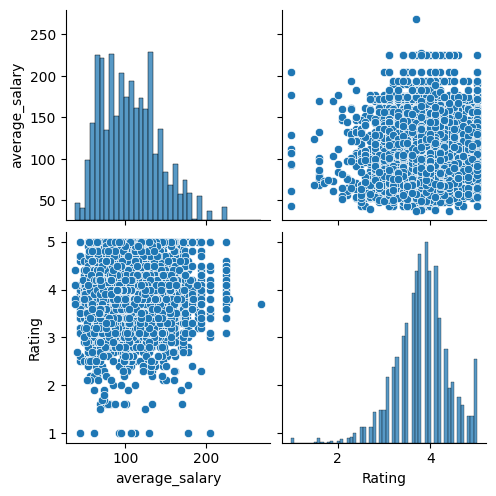

In [66]:
sns.pairplot(data=pr_df)

In [67]:
pr_df = pd.get_dummies(pr_df,['state','Job Title'])

In [68]:
pr_df

,average_salary,Rating,state_Business analyst,state_Machine Learning Engineer,state_data analyst,state_data engineer,state_data scientist,state_deep learning,state_director,state_manager,...,Job Title_NC,Job Title_NH,Job Title_NJ,Job Title_NM,Job Title_NY,Job Title_OH,Job Title_PA,Job Title_TX,Job Title_VA,Job Title_WI
0,146.0,3.5,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,146.0,4.5,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,146.0,3.4,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,146.0,3.4,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5,146.0,2.9,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,51.0,3.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5882,68.0,4.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5883,89.5,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5886,89.0,4.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [70]:
x = pr_df.drop(columns=['average_salary'])
y = pr_df['average_salary']

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [72]:
lr = LinearRegression()

In [73]:
lr.fit(x_train,y_train)

LinearRegression()

In [74]:
lr.intercept_

88.48872236590009

In [76]:
lr.coef_

array([  1.99220167,  -8.3560205 ,  11.77642398,  -7.11635621,
         1.48828018,  10.64530735, -22.66505847,  11.35722692,
         1.94383383,  -2.90800646,   3.83436938,   0.78565706,
        31.63293972,   5.42750714,  62.79051842, -13.73288003,
       -14.7121944 , -15.69870925, -24.54429218, -14.55342176,
         7.97969371,   1.15287972, -20.70439608, -12.2677627 ,
       -18.64195268,  -1.0473689 ,  10.18706517,  13.99482409,
        29.56153555,  -9.62154875,  -2.54663508,  -0.54195728,
         1.64479069, -16.54429218])

In [78]:
prediction = lr.predict(x_test)

<Axes: ylabel='average_salary'>

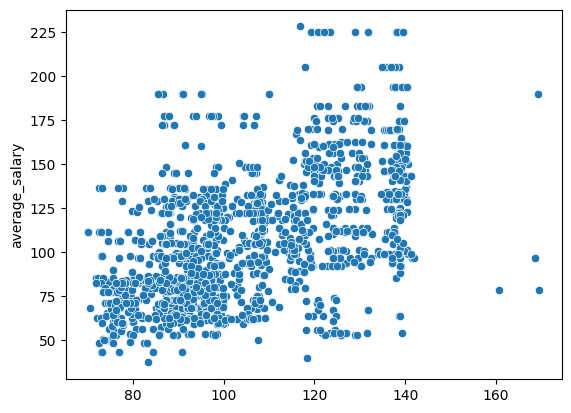

In [79]:
sns.scatterplot(x=prediction,y=y_test)

In [80]:
residual = prediction - y_test

<ipython-input-84-de15f7a7b687>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: xlabel='average_salary', ylabel='Density'>

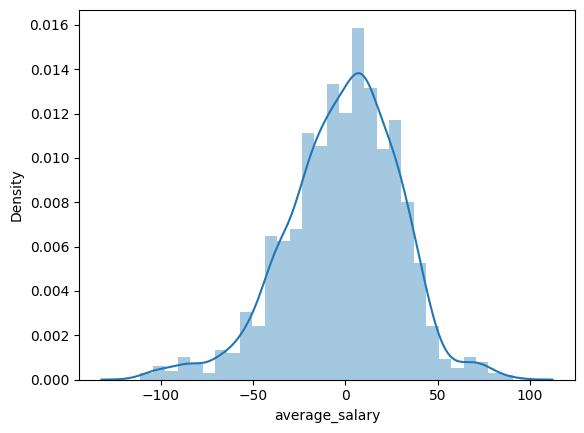

In [84]:
sns.distplot(residual)

In [85]:
print('MAE:',metrics.mean_absolute_error(prediction,y_test))

MAE: 23.624648811932676


In [90]:
pickle.dump(lr,open('salary_estimator2.pkl','wb'))